## OUTLIERS 

In statistics, an outlier is an observation point that is distant from other observations.

In [68]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
#mutliply and add by random numbers to get some real values
random_data = np.random.randn(500) *20+20

In [70]:
#Function to dectect outlier on one-dimensional datasets
anomalies = []
def find_anomalies(data):
    # set upper and lower limit to 3 std
    random_data_std = np.std(data)
    random_data_mean = np.mean(data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit = random_data_mean - anomaly_cut_off
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    print(upper_limit)
    #generate outliers
    for outlier in random_data :
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [71]:
find_anomalies(random_data)

-43.336565501869615
83.26352778885558


[-45.19155524099354]

In [72]:
data_test = [1,2,3,400,200,5,4,6,10]
find_anomalies(data_test)

-324.7950662131857
465.01728843540786


[-45.19155524099354]

### Boxplot

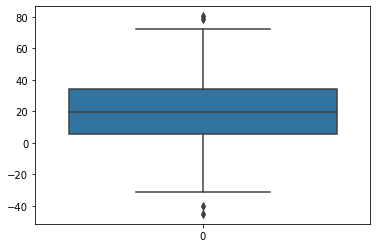

In [73]:
sns.boxplot(data = random_data)

### IQR 

In [74]:
import numpy as np

def find_outlier(yourlist):
    Q2 = np.quantile(yourlist, 0.50)
    Q1 = np.quantile(yourlist, 0.25)
    Q3 = np.quantile(yourlist, 0.75)
    
    IQR = (Q3 - Q1) * 1.5
    batas_bawah = Q1 - IQR
    batas_atas = Q3 + IQR 

    outlier = ''
    for i in range(len(yourlist)):
        if yourlist[i] > batas_atas :
            outlier = outlier + str(yourlist[i]) + ', '
        if yourlist[i] < batas_bawah :
            outlier = outlier + str(yourlist[i]) + ', '
    return outlier

In [75]:
list_random = [-288,1,2,4,3,5,6,7,8,40,5600]

In [76]:
find_outlier(list_random)

'-288, 40, 5600, '

### Z - Score

Zscore memaksa distribusi supaya data menjadi normal

In [77]:
from scipy import stats 
import numpy as np

In [78]:
list_random_data = random_data.tolist()
z = np.abs(stats.zscore(list_random_data))

#threshold = 3
print(np.where(z > 3))

#threshold = 2.5
print(np.where(z > 2.5))

(array([247], dtype=int64),)
(array([ 52, 120, 247, 499], dtype=int64),)


In [79]:
#where is the data ?

daftar_outlier = [  9,  25, 211, 252, 416]

data_outlier = []
for i in range(len(daftar_outlier)):
    data_outlier.append(list_random_data[i])

data_outlier

[15.513188756820815,
 38.043631212799504,
 42.91930920299218,
 -3.1537453815928096,
 22.993348479759423]

### Handling Outlier

Drop : Not a great option. We lost lots of information. Find out if gnuine extreme value or broken sensor.  
Mark : Safest option.  
Rescale :

In [80]:
import pandas as pd
houses = pd.DataFrame()
houses['Price'] = [234433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]

In [81]:
houses

,Price,Bathrooms,Square_Feet
0,234433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500
3,4322032,116.0,48000


### Option 1 : Drop

In [82]:
houses_clean = houses[houses['Bathrooms']<20]
houses_clean

,Price,Bathrooms,Square_Feet
0,234433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


### Option 2 : Mark

In [83]:
import numpy as np

# Create feature based on boolean condition
houses['Outlier'] = np.where(houses['Bathrooms'] < 20, 0, 1)

# show data
houses

,Price,Bathrooms,Square_Feet,Outlier
0,234433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,48000,1


### Option 3 : Rescale

In [84]:
# log feature 
houses['Log_Of_Square_Feet'] = [np.log(x) for x in houses['Square_Feet']]

# show data
houses

,Price,Bathrooms,Square_Feet,Outlier,Log_Of_Square_Feet
0,234433,2.0,1500,0,7.313220
1,392333,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,4322032,116.0,48000,1,10.778956


https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba?gi=5fc0215165e8